##### <html><h><font color='purple'>Loading and Organizing Data from CIFAR10

In [18]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [20]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)


In [21]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
print('Noof features:',Din)
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

Noof classes: 10
Noof training images: 50000
Noof test images: 10000
Noof features: 3072


In [22]:
print('original labels:',y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
print('labels in class matrix:',y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

original labels: (50000, 1)
labels in class matrix: (50000, 10)


In [23]:
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train: (50000, 3072)
x_test: (10000, 3072)


##### <html><h><font color='purple'>Linear Classifier

In [24]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print('w1:',w1)

w1: (3072, 10)
b1: (10,)
w1: [[ 1.29146462e-06  9.42111778e-06  1.12126491e-05 ... -9.64920544e-06
   1.12460181e-05  1.31297978e-05]
 [-2.23099501e-06  7.17493430e-06  5.26680383e-06 ...  1.22408553e-06
  -3.76083900e-06 -1.31851151e-05]
 [-1.35077671e-05 -3.95175618e-06  1.29329182e-06 ... -6.92197329e-07
   2.84996333e-06  4.71158374e-08]
 ...
 [-1.26856478e-05 -5.94299393e-06 -1.89157571e-07 ... -9.06068524e-06
   1.14229693e-06  1.03230497e-05]
 [ 1.82496863e-05 -5.43759365e-06  6.03939124e-06 ...  1.76578940e-05
   1.45017104e-05 -1.16852484e-06]
 [-2.21378810e-06 -1.01640222e-06  3.57522903e-07 ... -1.78302680e-06
  -2.78137513e-05 -1.93469235e-05]]


In [25]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1) + b1
    y_pred_test=x_test.dot(w1)+b1
    #classes=np.argmax(prediction,axis=1)
    #prediction=y_pred(classes)
    #classes=np.reshape(classes,(Ntr,1))
    #classes=tf.keras.utils.to_categorical(classes, num_classes=K)
    
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    #db1=np.reshape(db1,(K))
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay






epoch 0/300: train loss= 1.000010-- ,test loss= 1.000018--,train accuracy= 0.676194--, test accuracy= 0.673540
epoch 10/300: train loss= 0.876639-- ,test loss= 0.876242--,train accuracy= 0.756398--, test accuracy= 0.758070
epoch 20/300: train loss= 0.842541-- ,test loss= 0.842421--,train accuracy= 0.762586--, test accuracy= 0.767680
epoch 30/300: train loss= 0.823617-- ,test loss= 0.823718--,train accuracy= 0.766518--, test accuracy= 0.770500
epoch 40/300: train loss= 0.812389-- ,test loss= 0.812710--,train accuracy= 0.768604--, test accuracy= 0.771590
epoch 50/300: train loss= 0.805427-- ,test loss= 0.805972--,train accuracy= 0.770344--, test accuracy= 0.772900
epoch 60/300: train loss= 0.800906-- ,test loss= 0.801681--,train accuracy= 0.771550--, test accuracy= 0.773410
epoch 70/300: train loss= 0.797822-- ,test loss= 0.798826--,train accuracy= 0.772698--, test accuracy= 0.773580
epoch 80/300: train loss= 0.795605-- ,test loss= 0.796836--,train accuracy= 0.773800--, test accuracy= 0.

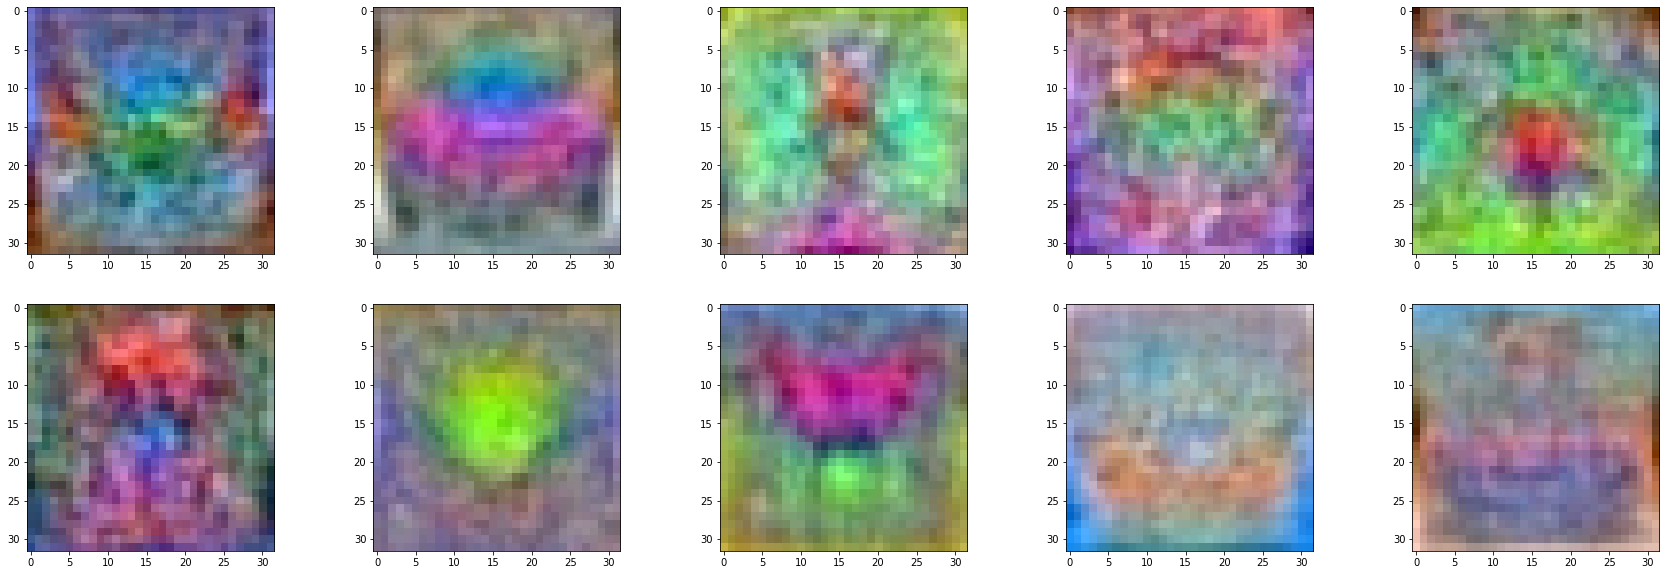

In [26]:
#Displaying w as 10 images
import cv2 as cv
images=[]
for i in range(w1.shape[1]):
    temp=np.reshape(w1[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
plt.show()

##### <html><h><font color='purple'>Two Layer Fully Connected Network

In [28]:
H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [29]:
def sigmoid(x,w,b):
   return 1./(1.0 + np.exp(-(x.dot(w)+b))) 

In [ ]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    z1=sigmoid(x,w1,b1)
    y_pred=z1.dot(w2)+b2

    #loss
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    #accuracy
    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr *= lr_decay




